Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
# Unzip the dataset
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" > /dev/null

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,validation_split=0.2,subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

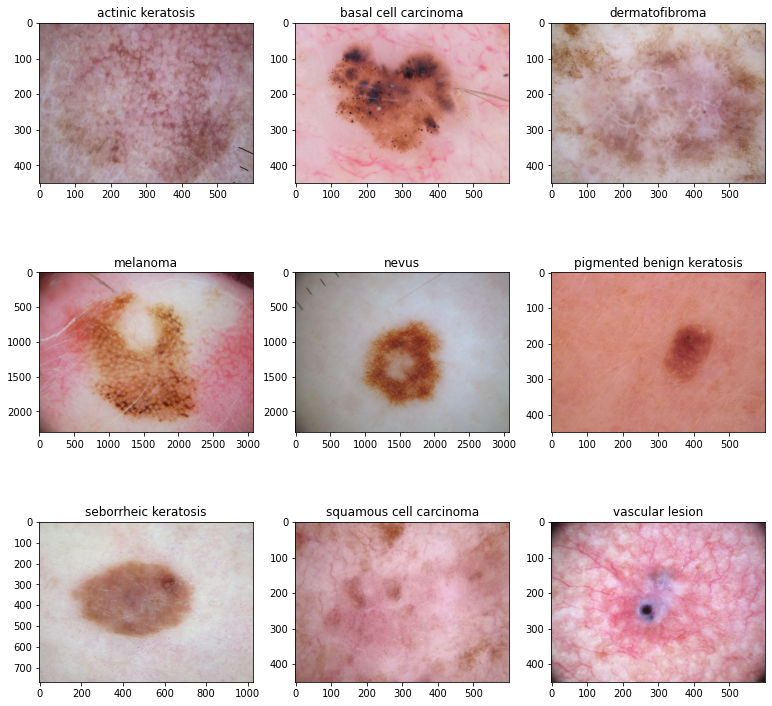

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(13,13))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_Class = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

#First CNN Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second CNN Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third CNN Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Here flattens function used for convert multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
model.add(layers.Dense(num_Class, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
## Here we use adam as optimiser it is gradient descent method.
## Here categorical_crossentropy this function used for loss function.
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 90ms/step - loss: 2.0841 - accuracy: 0.2115 - val_loss: 1.9309 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7764 - accuracy: 0.3493 - val_loss: 1.5665 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5447 - accuracy: 0.4671 - val_loss: 1.4694 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4431 - accuracy: 0.4955 - val_loss: 1.4828 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.3945 - accuracy: 0.5156 - val_loss: 1.4565 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.2671 - accuracy: 0.5413 - val_loss: 1.3615 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2303 - accuracy: 0.5580 - val_loss: 1.6281 - val_accuracy: 0.4564
Epoch 8/20
5

### Visualizing training results

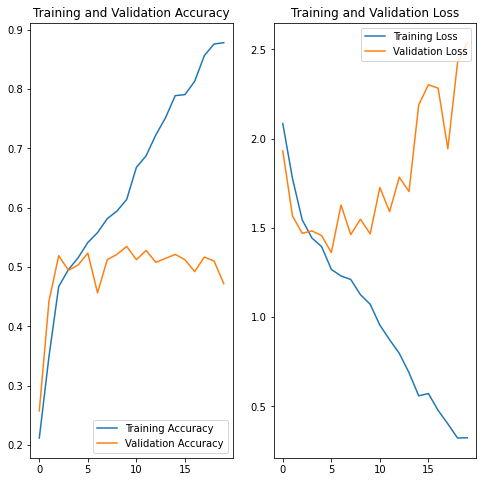

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Here we clearly show the model is overfit, Training and Validation Accuracy is 0.87 and 0.47 and also Training and Validation Loss in trainingin loss is decrese and Validation Loss is increse that's why this model is overfit**

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument =tf.keras.Sequential([
                             #Randomly flip each image vertically and horizontally.
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             #Randomly Rotation each image.
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             #Randomly Zoom each image.
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
])

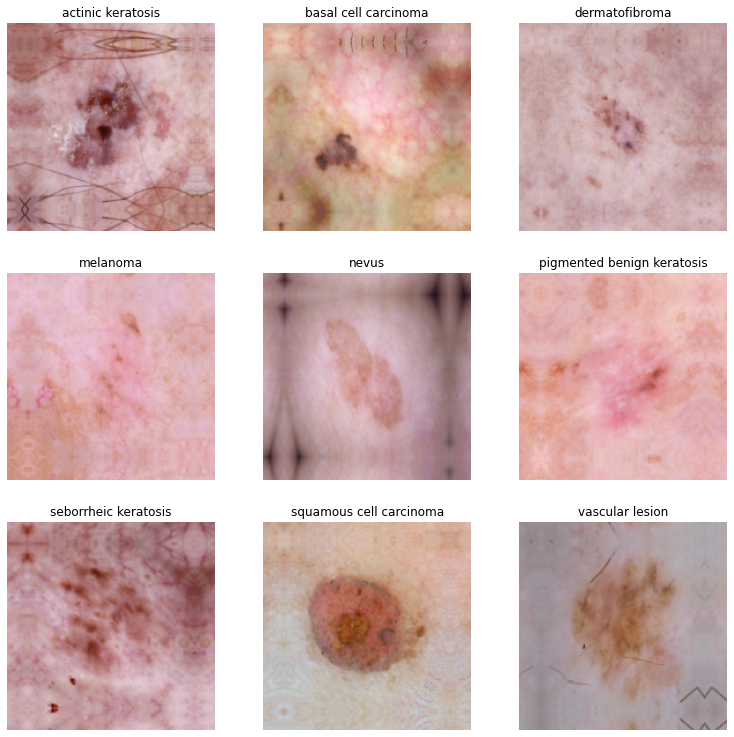

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(13, 13))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## Here we are going to use Dropout layer if there is an evidence of overfitting in your findings.

num_classes = 9
model1 = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])

#First CNN Layer
model1.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% of the input.
model1.add(layers.Dropout(0.25))

#Second CNN Layer
model1.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% of the input.
model1.add(layers.Dropout(0.25))

#Third CNN Layer
model1.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

#Here flattens function used for convert multi-dimensional input tensors into a single dimension.
model1.add(layers.Flatten())

#Dense Layer
model1.add(layers.Dense(512,activation='relu'))

#Dense Layer
model1.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% of the input.
model1.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
model1.add(layers.Dense(num_Class, activation = "softmax"))


### Compiling the model

In [20]:
## Your code goes here
# Here we compile the model
model1.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model1.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/20
56/56 [==============================] - 4s 51ms/step - loss: 2.3693 - accuracy: 0.1853 - val_loss: 2.1053 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 2.0768 - accuracy: 0.1914 - val_loss: 2.0938 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 2.0590 - accuracy: 0.1758 - val_loss: 2.0439 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 2.0388 - accuracy: 0.2009 - val_loss: 2.0408 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 3s 53ms/step - loss: 2.0204 - accuracy: 0.2065 - val_loss: 1.9669 - val_accuracy: 0.2729
Epoch 6/20
56/56 [==============================] - 3s 49ms/step - loss: 1.9496 - accuracy: 0.2578 - val_loss: 1.8821 - val_accuracy: 0.2975
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.8914 - accuracy: 0.2868 - val_loss: 1.8260 - val_accuracy: 0.3311
Epoch 8/20
56

### Visualizing the results

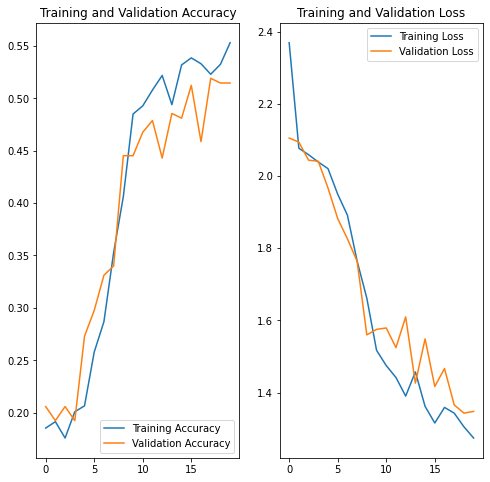

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Here we can see the overfitting problem has solved using the data augmentation and dropout layer but accurcy is low our model has accuracy: 0.5530, val_accuracy: 0.5145**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#**Class imbalance**

In [23]:
## Your code goes here.
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class_Name', 'Image_Number'])

df = class_distribution_count(data_dir_train)
df

,Class_Name,Image_Number
0,nevus,357
1,pigmented benign keratosis,462
2,melanoma,438
3,basal cell carcinoma,376
4,seborrheic keratosis,77
5,actinic keratosis,114
6,dermatofibroma,95
7,squamous cell carcinoma,181
8,vascular lesion,139


<BarContainer object of 9 artists>

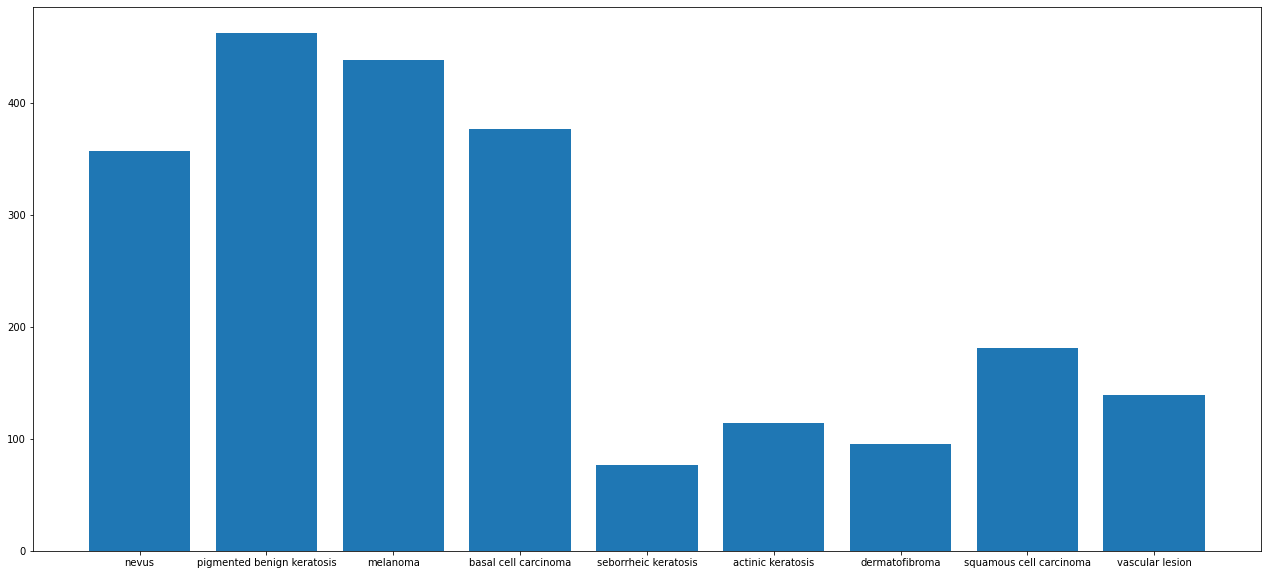

In [24]:
plt.figure(figsize=(22,10))
plt.bar(df.Class_Name,df.Image_Number)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

### - **Here we see a graph in this seborrheic keratosis has 77 least number of sample.**
### -  **As per graph pigmented benign keratosis has 462 number of sample, melanoma has 438 number of sample and basal cell carcinoma	has 376 number of sample.**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2228414090>: 100%|██████████| 500/500 [00:18<00:00, 27.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2228414890>: 100%|██████████| 500/500 [00:19<00:00, 25.77 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22286FEFD0>: 100%|██████████| 500/500 [00:20<00:00, 24.62 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F22284AB9D0>: 100%|██████████| 500/500 [01:30<00:00,  5.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x645 at 0x7F2228482C10>: 100%|██████████| 500/500 [01:22<00:00,  6.03 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F22283AAA90>: 100%|██████████| 500/500 [00:19<00:00, 26.01 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F2228428AD0>: 100%|██████████| 500/500 [00:40<00:00, 12.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22284A67D0>: 100%|██████████| 500/500 [00:16<00:00, 30.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F22283A0B10>: 100%|██████████| 500/500 [00:16<00:00, 30.68 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0025427.jpg_bb0b6fdc-39dc-4477-a605-d8d3abf511fe.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0025368.jpg_a72e5cc1-f800-4f31-b59b-b186e4d26918.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000443.jpg_f9258ac3-d276-48b1-88fc-07bdd10a9d9b.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000232.jpg_677574fb-88cc-4c27-a765-3bfffde87361.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000529.jpg_c33bc3c5-a04f-41d6-af87-3d371d071683.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000409.jpg_8473b17e-bc7d-4d13-93f3-3b06b3f4e353.jpg'

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [33]:
df2['Label'].value_counts()

nevus                         500
pigmented benign keratosis    500
melanoma                      500
basal cell carcinoma          500
seborrheic keratosis          500
actinic keratosis             500
dermatofibroma                500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here
num_classes = 9
model2 = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])

#First CNN Layer
model2.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25))

#Second CNN Layer
model2.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25))

#Third CNN Layer
model2.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Here flattens function used for convert multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dropout layer
model2.add(layers.Dropout(0.25))

#Batch normalization used for make neural networks faster and more stable.
model2.add(layers.BatchNormalization())

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% input.
model2.add(layers.Dropout(0.50))

#Batch normalization
model2.add(layers.BatchNormalization())

#Dense Layer with softmax activation function.
model2.add(layers.Dense(num_Class, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here
## Here sparse_categorical_crossentropy this function used for loss function.
model2.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs =50
## Your code goes here, use 50 epochs.
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 38s 209ms/step - loss: 2.5739 - accuracy: 0.1536 - val_loss: 3.7561 - val_accuracy: 0.1359
Epoch 2/50
169/169 [==============================] - 25s 141ms/step - loss: 2.0924 - accuracy: 0.2341 - val_loss: 2.8867 - val_accuracy: 0.1500
Epoch 3/50
169/169 [==============================] - 25s 141ms/step - loss: 1.7746 - accuracy: 0.3279 - val_loss: 1.8267 - val_accuracy: 0.3215
Epoch 4/50
169/169 [==============================] - 26s 149ms/step - loss: 1.6121 - accuracy: 0.3919 - val_loss: 2.3748 - val_accuracy: 0.2413
Epoch 5/50
169/169 [==============================] - 25s 141ms/step - loss: 1.5058 - accuracy: 0.4243 - val_loss: 1.6693 - val_accuracy: 0.3601
Epoch 6/50
169/169 [==============================] - 24s 141ms/step - loss: 1.4512 - accuracy: 0.4527 - val_loss: 1.6780 - val_accuracy: 0.3578
Epoch 7/50
169/169 [==============================] - 25s 141ms/step - loss: 1.3997 - accuracy: 0.4679 - val_loss: 1.8758 - val_ac

#### **Todo:**  Visualize the model results

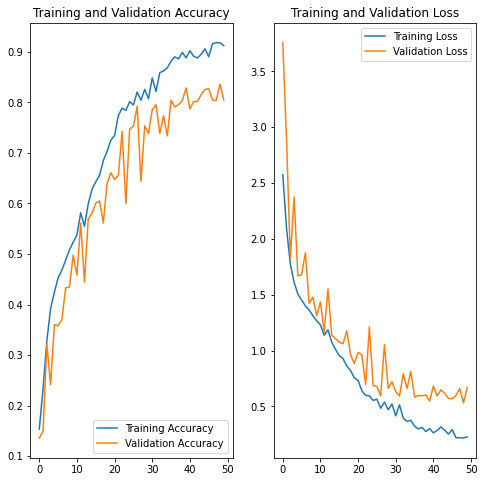

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## - Accuracy on training data has increased by using Augment and class imbalance to solve overfitting issue

## - Our last model get best training accuracy and val_accuracy